<a href="https://colab.research.google.com/github/angeloHowell/Computer-Vision/blob/main/document_scanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Corner detection

Angelo Alexander Howell Diaz

Universidad Tecnológica de Bolívar

In this activity we will go through corner detection for a document scanner

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
from google.colab import files

Por favor, selecciona una imagen para subir...


Saving test documento.jpg to test documento.jpg


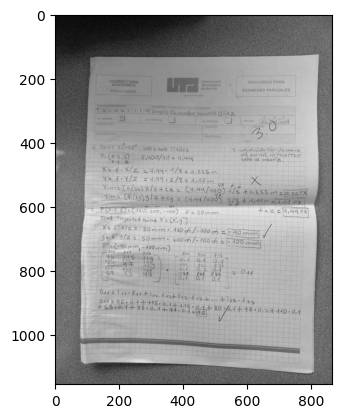

In [ ]:
try:
    print("Por favor, selecciona una imagen para subir...")
    uploaded = files.upload()

    if not uploaded:
        print("No se seleccionó ninguna imagen")
    else:
        filename = next(iter(uploaded))
        img = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)

        # Convertir a escala de grises y mostrar
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt.imshow(gray, cmap = 'gray')
        plt.show()

except KeyboardInterrupt:
    print("\nProceso de subida cancelado por el usuario")
except Exception as e:
    print(f"Ocurrió un error: {str(e)}")

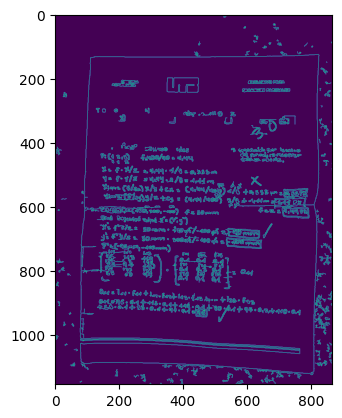

In [ ]:
detail = cv2.detailEnhance(img,sigma_s = 20, sigma_r = 0.15)
gray = cv2.cvtColor(detail,cv2.COLOR_BGR2GRAY) # GRAYSCALE IMAGE
blur = cv2.GaussianBlur(gray,(5,5),0)

# edge detect
edge_image = cv2.Canny(blur,75,200)
plt.imshow(edge_image)

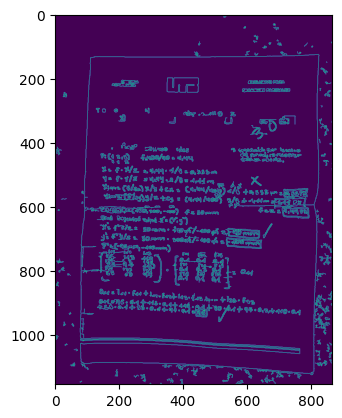

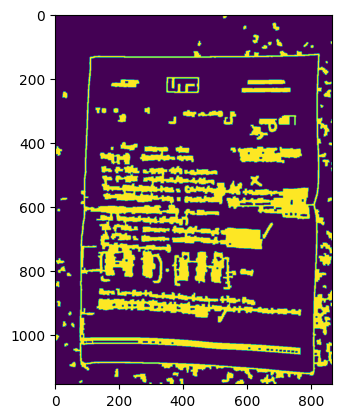

In [ ]:
detail = cv2.detailEnhance(img,sigma_s = 20, sigma_r = 0.15)
gray = cv2.cvtColor(detail,cv2.COLOR_BGR2GRAY) # GRAYSCALE IMAGE
blur = cv2.GaussianBlur(gray,(5,5),0)

# edge detect
edge_image = cv2.Canny(blur,75,200)

# morphological transform
kernel = np.ones((5,5),np.uint8)
dilate = cv2.dilate(edge_image,kernel,iterations=1)
closing = cv2.morphologyEx(dilate,cv2.MORPH_CLOSE,kernel)

plt.imshow(edge_image)
plt.show()

plt.imshow(closing)
plt.show()

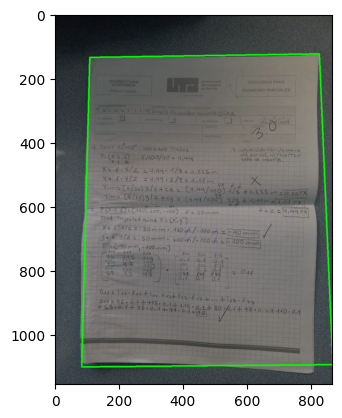

In [ ]:
# find the contours
contours , hire = cv2.findContours(closing, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

contours = sorted(contours, key=cv2.contourArea, reverse=True)
for contour in contours:
    perimeter = cv2.arcLength(contour,True)
    corners = cv2.approxPolyDP(contour,0.02*perimeter, True)

    if len(corners) == 4:
        four_points = np.squeeze(corners)
        break

cv2.drawContours(img,[four_points],-1,(0,255,0),3)
plt.imshow(img)

In [ ]:
four_points

array([[ 824,  124],
       [ 108,  135],
       [  83, 1102],
       [ 866, 1095]], dtype=int32)

In [ ]:
four_points[:,0]

array([824, 108,  83, 866], dtype=int32)

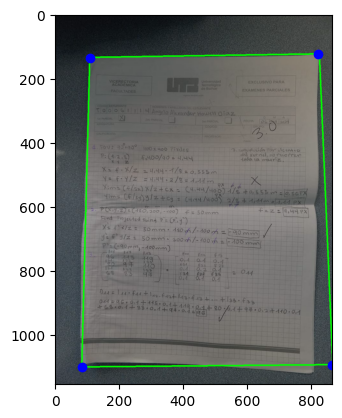

In [ ]:
plt.imshow(img)
plt.plot(four_points[:,0],four_points[:,1], 'bo')
plt.show()

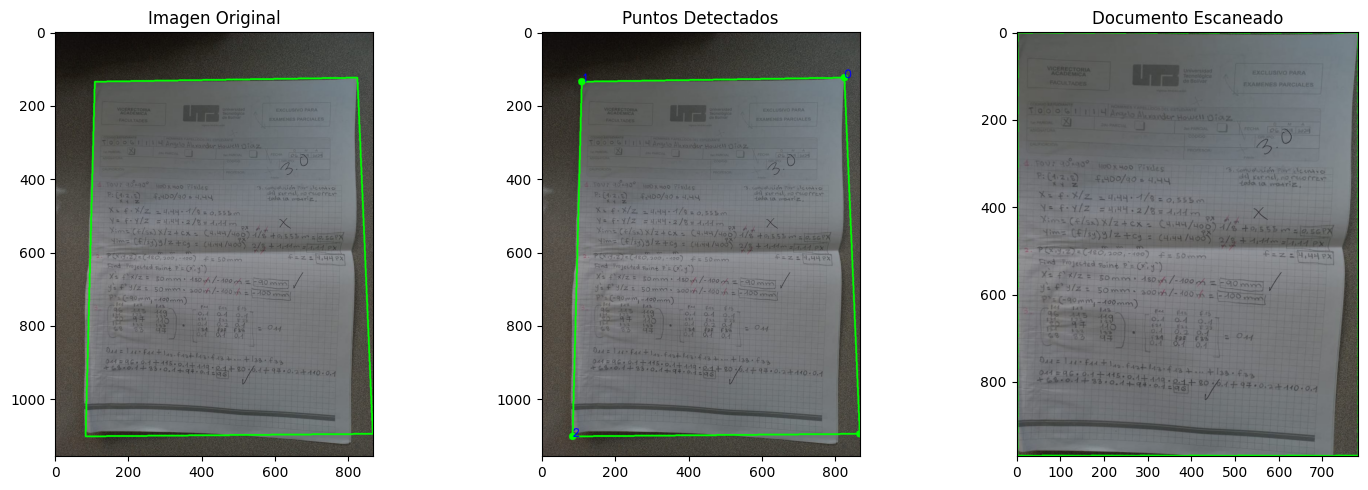

In [ ]:
def order_points(pts):
    #4 puntos ordenados
    #[top-left, top-right, bottom-right, bottom-left]
    pts = pts.astype(np.float32)
    rect = np.zeros((4, 2), dtype=np.float32)

    pts_sum = pts.sum(axis=1)
    diff = np.diff(pts, axis=1)

    rect[0] = pts[np.argmin(pts_sum)]    # Top-left
    rect[2] = pts[np.argmax(pts_sum)]    # Bottom-right
    rect[1] = pts[np.argmin(diff)]       # Top-right
    rect[3] = pts[np.argmax(diff)]       # Bottom-left

    return rect

def get_warped_image(image, points):
    #Transformación de perspectiva usando 4 puntos
    rect = order_points(points)
    (tl, tr, br, bl) = rect

    # Calcular dimensiones
    width_bottom = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    width_top = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    max_width = max(int(width_bottom), int(width_top))

    height_right = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    height_left = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    max_height = max(int(height_right), int(height_left))

    dst = np.array([
        [0, 0],
        [max_width - 1, 0],
        [max_width - 1, max_height - 1],
        [0, max_height - 1]
    ], dtype=np.float32)

    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (max_width, max_height))

    return warped

# Aplicar la transformación y mostrar resultados
img_with_points = img.copy()

# Dibujar puntos numerados
for i, point in enumerate(four_points):
    cv2.circle(img_with_points, tuple(point), 10, (0, 255, 0), -1)
    cv2.putText(img_with_points, str(i), tuple(point),
               cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Obtener imagen transformada
warped = get_warped_image(img, four_points)

# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')

plt.subplot(132)
plt.imshow(cv2.cvtColor(img_with_points, cv2.COLOR_BGR2RGB))
plt.title('Puntos Detectados')

plt.subplot(133)
plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
plt.title('Documento Escaneado')

plt.tight_layout()
plt.show()

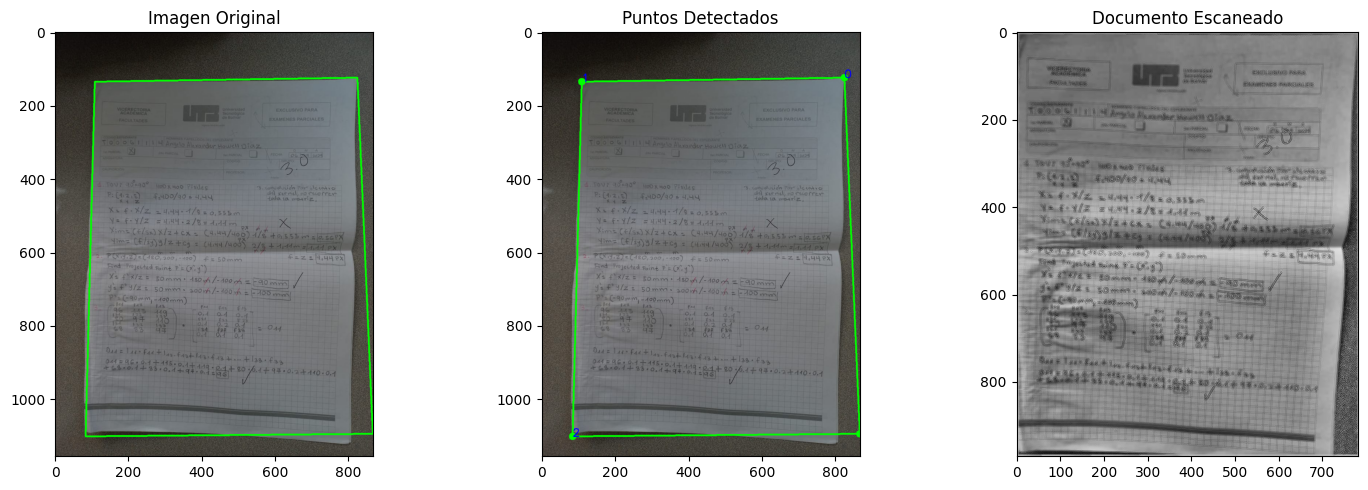

In [ ]:
def order_points(pts):
    #4 puntos ordenados
    #[top-left, top-right, bottom-right, bottom-left]
    pts = pts.astype(np.float32)
    rect = np.zeros((4, 2), dtype=np.float32)

    pts_sum = pts.sum(axis=1)
    diff = np.diff(pts, axis=1)

    rect[0] = pts[np.argmin(pts_sum)]    # Top-left
    rect[2] = pts[np.argmax(pts_sum)]    # Bottom-right
    rect[1] = pts[np.argmin(diff)]       # Top-right
    rect[3] = pts[np.argmax(diff)]       # Bottom-left

    return rect

def get_warped_image(image, points):
    # Transformación de perspectiva usando 4 puntos
    rect = order_points(points)
    (tl, tr, br, bl) = rect

    # Calcular dimensiones
    width_bottom = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    width_top = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    max_width = max(int(width_bottom), int(width_top))

    height_right = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    height_left = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    max_height = max(int(height_right), int(height_left))

    dst = np.array([
        [0, 0],
        [max_width - 1, 0],
        [max_width - 1, max_height - 1],
        [0, max_height - 1]
    ], dtype=np.float32)

    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (max_width, max_height))

    # Convertir a escala de grises
    gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)

    # Mejorar el contraste con ecualización de histograma adaptativa (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)

    # Aplicar un filtro de detalles finos (realce Laplaciano)
    laplacian = cv2.Laplacian(enhanced, cv2.CV_64F)
    sharpened = cv2.convertScaleAbs(enhanced + laplacian)

    # Convertir a BGR para mostrar con Matplotlib (opcional)
    final = cv2.cvtColor(sharpened, cv2.COLOR_GRAY2BGR)

    return final

# Aplicar la transformación y mostrar resultados
img_with_points = img.copy()

# Dibujar puntos numerados
for i, point in enumerate(four_points):
    cv2.circle(img_with_points, tuple(point), 10, (0, 255, 0), -1)
    cv2.putText(img_with_points, str(i), tuple(point),
               cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Obtener imagen transformada
warped = get_warped_image(img, four_points)

# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')

plt.subplot(132)
plt.imshow(cv2.cvtColor(img_with_points, cv2.COLOR_BGR2RGB))
plt.title('Puntos Detectados')

plt.subplot(133)
plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
plt.title('Documento Escaneado')

plt.tight_layout()
plt.show()
